In [3]:
%matplotlib inline

import os
import json
import sys
import copy

from pprint import pprint

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import cost_model

# the folder containing all exports
EXPORT_DIR = "./saved_designs"
FEATURE_NAMES = []

def load_design(design_dir):
    """the directory containing exported designs"""

    design = {}
    # load saved designs and trashed designs
    with open(os.path.join(design_dir, "saved.json")) as f:
        design["saved"] = json.load(f)["saved"]
    with open(os.path.join(design_dir, "trashed.json")) as f:
        design["trashed"] = json.load(f)["trashed"]
    design["dirname"] = design_dir
    return design


def load_dataset(export_dir):
    # load all designs from the export dir
    # iterate over all exported deisngs
    dataset = []
    for dirname in os.listdir(export_dir):
        design_dir = os.path.join(export_dir, dirname)
        if not os.path.isdir(design_dir):
            continue
        designs = load_design(design_dir)

        saved = designs["saved"]
        trashed = designs["trashed"]
        
        for s in saved:
            for t in trashed:
                fs = get_feature(s)
                ts = get_feature(t)
                if np.random.randint(2) == 1:
                    dataset.append((fs - ts, 1))
                else:
                    dataset.append((ts - fs, -1))
                print(fs - ts)
    return dataset

def get_feature(design):
    # process layout trees
    layout_tree = design["elements"]
    layout_tree = copy.deepcopy(layout_tree)
    cost_model.process_element_tree(layout_tree)

    # compute features
    screen_features = cost_model.extract_layout_features(layout_tree)

    return np.array([screen_features[key] for key in sorted(screen_features)])

dataset = load_dataset(EXPORT_DIR)
print(len(dataset))

[ 0.         -0.00467527 -0.18912998  0.11902778 -0.12005792  0.66666667
 -0.05292434  0.        ]
[ 0.          0.00049723 -0.23373781  0.05537326 -0.17102764  0.25
 -0.01791477  0.        ]
[ 0.          0.00793912 -0.18679395 -0.02632378 -0.03416365  0.125
  0.01098166  0.        ]
[ 0.          0.00555517 -0.19000552  0.00701389 -0.14209092  0.
  0.03748948  0.        ]
[0. 0. 0. 0. 0. 0. 0. 0.]
[ 0.          0.0051725  -0.04460783 -0.06365451 -0.05096972 -0.41666667
  0.03500957  0.        ]
[ 0.          0.01261439  0.00233604 -0.14535156  0.08589427 -0.54166667
  0.063906    0.        ]
[ 0.          0.01023044 -0.00087553 -0.11201389 -0.02203301 -0.66666667
  0.09041381  0.        ]
[ 0.         -0.0051725   0.04460783  0.06365451  0.05096972  0.41666667
 -0.03500957  0.        ]
[0. 0. 0. 0. 0. 0. 0. 0.]
[ 0.          0.00744189  0.04694387 -0.08169705  0.13686399 -0.125
  0.02889643  0.        ]
[ 0.          0.00505794  0.04373229 -0.04835938  0.02893672 -0.25
  0.05540424  

 -0.35614227  0.        ]
[ 0.          0.00086414 -0.24794843 -0.04013889 -0.28884127  0.25
 -0.06583926  0.        ]
[ 0.         -0.00264005 -0.17222075 -0.04112847 -0.05512488  0.
  0.02545092  0.        ]
[ 0.06225328  0.0070574  -0.17951336 -0.20046875 -0.24405319  0.
 -0.04409693  0.        ]
[ 0.         -0.01317373 -0.38714333  0.11331597 -0.30449737  0.
 -0.13426787  0.        ]
[ 0.          0.00301928 -0.11212941 -0.26248264 -0.21485049  0.
  0.05944534  0.        ]
[ 0.         -0.00405215 -0.11875754  0.07855903 -0.11558774  0.
 -0.0652985   0.        ]
[ 0.          0.00846523 -0.09380569 -0.21390625 -0.17622662  0.
 -0.35938192  0.        ]
[ 0.07938346 -0.1108742  -0.04119207 -0.23642361 -0.09874269 -0.02424242
  0.09387792  0.        ]
[ 0.10132219 -0.11078304  0.05053629 -0.15314236 -0.09680271 -0.09090909
  0.1198432   0.        ]
[-0.06438632 -0.15030232 -0.10393632 -0.1971875  -0.0308149   0.18686869
  0.17136621  0.        ]
[-0.03458272 -0.07107497 -0.05208008 -

 -0.18825588  0.        ]
[ 0.12280119 -0.32948691 -0.44766509  0.23881944 -0.12686499 -0.15384615
 -0.12174759  0.        ]
[ 0.         -0.35354298 -0.56026104  0.3934375  -0.12897378  0.03663004
 -0.13600733  0.        ]
[ 0.12134831 -0.31801305 -0.41120352  0.12840278 -0.16150162 -0.15384615
 -0.09503039  0.        ]
[ 0.         -0.30450961 -0.54536209  0.1359375  -0.10162894  0.01282051
 -0.15461046  0.        ]
[ 0.         -0.30430518 -0.41924347  0.12840278 -0.21506588 -0.15384615
 -0.12700334  0.        ]
[ 0.         -0.3299011  -0.42503838  0.33135417 -0.18156611 -0.08717949
 -0.13626117  0.        ]
[ 0.         -0.32374519 -0.44518237  0.08350694 -0.22358474 -0.11538462
  0.02761349  0.        ]
[ 0.14376978 -0.34814373 -0.41430301  0.13984375 -0.11026033 -0.03859649
 -0.05634952  0.        ]
[ 0.16570851 -0.34805257 -0.32257465  0.223125   -0.10832035 -0.10526316
 -0.03038423  0.        ]
[ 0.         -0.38757185 -0.47704726  0.17907986 -0.04233253  0.17251462
  0.021138

[ 0.08250298 -0.00257699 -0.24100694  0.13758681  0.07382782  0.71428571
 -0.04081156  0.        ]
[-0.02199912 -0.00896589 -0.2098407   0.165       0.09121072  0.57142857
  0.05020215  0.        ]
[-0.02547477  0.00648796 -0.14005333  0.10729167  0.13983297  0.7
 -0.08269579  0.        ]
[ 0.02307181 -0.00814714 -0.13683277  0.09409722  0.1286862   0.71428571
 -0.14407515  0.        ]
[ 0.1290274  -0.03029706 -0.34768999  0.2140625   0.03756837  0.42105263
 -0.05495895  0.        ]
[-0.0099395  -0.01420763 -0.29855932  0.21265625 -0.02510987  0.77777778
 -0.14978114  0.        ]
[ 0.30805662  0.0100125  -0.23664845  0.12662326  0.01048673  0.14285714
  0.01715994  0.        ]
[ 0.18692898 -0.01444809 -0.16130295  0.0925      0.07434359  0.71428571
  0.00318031  0.        ]
[ 0.14712408 -0.01284694 -0.18642032  0.15703125  0.16859257  0.44444444
 -0.00798141  0.        ]
[-0.38584047 -0.0379937  -0.09255973  0.28736979  0.16998492  0.16666667
 -0.0467416   0.        ]
[-0.33723169 -0.0

[-0.0565546  -0.00055742  0.01215962  0.04248264  0.01092421  0.16666667
  0.0923163   0.        ]
[-0.0565546  -0.00175774 -0.01461593 -0.03175347 -0.00354441  0.
  0.32057739  0.        ]
[0. 0. 0. 0. 0. 0. 0. 0.]
[-0.01305388 -0.02070213 -0.06455981  0.18276042  0.04459057 -0.13333333
  0.01381742  0.        ]
[ 0.01168865  0.00633897 -0.03576568 -0.04986111 -0.01223021 -0.13333333
 -0.03599361  0.        ]
[-0.05263681 -0.00865441  0.05060538  0.11982639  0.09905706 -0.13333333
  0.00267363  0.        ]
[-0.02221547  0.00816667  0.14789448 -0.01861111  0.14105653 -0.13333333
  0.08801903  0.        ]
[ 0.08216949  0.0085074   0.016737   -0.02430556  0.01649256  0.25555556
 -0.0984091   0.        ]
[ 0.05194366 -0.00212002  0.05961042  0.03534722  0.05876895 -0.13333333
  0.08728674  0.        ]
[ 0.01144946  0.00042893 -0.0479888  -0.12965278  0.04243149 -0.13333333
  0.06648153  0.        ]
[ 0.01057456  0.00967935  0.04877655 -0.18895833  0.07450306 -0.13333333
  0.10631989  0.  

[0. 0. 0. 0. 0. 0. 0. 0.]
[-0.0404942   0.00254895 -0.10759922 -0.165      -0.01633746  0.
 -0.02080521  0.        ]
[-0.0413691   0.01179937 -0.01083387 -0.22430556  0.0157341   0.
  0.01903315  0.        ]
[-0.10458046 -0.00092625 -0.07729859 -0.03928819  0.0313504   0.
 -0.05631523  0.        ]
[-0.05792974 -0.02049704 -0.0945504   0.10756944 -0.001679    0.05263158
 -0.13808199  0.        ]
[-0.00096227  0.00483843  0.06451947 -0.10262153  0.12353807  0.
  0.0081648   0.        ]
[ 0.1160175  -0.00383999  0.00774992  0.04128472  0.06209244  0.61538462
 -0.00382805  0.        ]
[-0.05258117 -0.02086755 -0.11087817  0.12232639 -0.02636187  0.
 -0.14388057  0.        ]
[-0.02657924  0.00197268 -0.14586233 -0.1128125   0.00995466  0.
 -0.10906991  0.        ]
[-0.01144946 -0.00042893  0.0479888   0.12965278 -0.04243149  0.13333333
 -0.06648153  0.        ]
[-0.02450334 -0.02113105 -0.01657101  0.31241319  0.00215907  0.
 -0.05266412  0.        ]
[ 0.00023919  0.00591005  0.01222312  0.

[-0.16631386  0.0037699   0.04957384  0.10848958  0.10319038  0.
  0.02081683  0.        ]
[-0.0619289   0.00411064 -0.08158363  0.10279514 -0.02137359  0.38888889
 -0.1656113   0.        ]
[-0.09215473 -0.00651679 -0.03871021  0.16244792  0.0209028   0.
  0.02008455  0.        ]
[-0.13264893 -0.00396784 -0.14630943 -0.00255208  0.00456534  0.
 -0.00072066  0.        ]
[-0.13352383  0.00528258 -0.04954408 -0.06185764  0.03663691  0.
  0.0391177   0.        ]
[-0.1967352  -0.00744303 -0.1160088   0.12315972  0.0522532   0.
 -0.03623069  0.        ]
[-0.15008448 -0.02701382 -0.13326062  0.27001736  0.01922381  0.05263158
 -0.11799745  0.        ]
[-0.09311701 -0.00167836  0.02580926  0.05982639  0.14444087  0.
  0.02824935  0.        ]
[ 0.02386276 -0.01035677 -0.03096029  0.20373264  0.08299524  0.61538462
  0.0162565   0.        ]
[-0.14473591 -0.02738434 -0.14958839  0.28477431 -0.00545907  0.
 -0.12379602  0.        ]
[-0.11873398 -0.00454411 -0.18457254  0.04963542  0.03085747  0.
 

[ 0.07800122  0.00850707 -0.13685729 -0.19729167 -0.03033344  0.
 -0.0244568   0.        ]
[ 0.02221547 -0.00816667 -0.14789448  0.01861111 -0.14105653  0.13333333
 -0.08801903  0.        ]
[ 0.00916159 -0.0288688  -0.21245429  0.20137153 -0.09646596  0.
 -0.07420161  0.        ]
[ 0.03390411 -0.00182769 -0.18366016 -0.03125    -0.15328674  0.
 -0.12401264  0.        ]
[-0.03042134 -0.01682108 -0.0972891   0.1384375  -0.04199947  0.
 -0.08534539  0.        ]
[0. 0. 0. 0. 0. 0. 0. 0.]
[ 1.04384956e-01  3.40736837e-04 -1.31157473e-01 -5.69444444e-03
 -1.24563966e-01  3.88888889e-01 -1.86428128e-01  0.00000000e+00]
[ 0.07415912 -0.01028669 -0.08828406  0.05395833 -0.08228757  0.
 -0.00073228  0.        ]
[ 0.03366493 -0.00773774 -0.19588328 -0.11104167 -0.09862503  0.
 -0.02153749  0.        ]
[ 0.03279002  0.00151268 -0.09911793 -0.17034722 -0.06655347  0.
  0.01830087  0.        ]
[-0.03042134 -0.01121293 -0.16558265  0.01467014 -0.05093717  0.
 -0.05704752  0.        ]
[ 0.01622938 -0.

[-0.22059796  0.00291374 -0.08504851 -0.08057292 -0.03074204 -0.61538462
 -0.05248718  0.        ]
[-0.17394724 -0.01665705 -0.10230032  0.06628472 -0.06377144 -0.56275304
 -0.13425394  0.        ]
[-0.11697977  0.00867842  0.05676955 -0.14390625  0.06144563 -0.61538462
  0.01199285  0.        ]
[0. 0. 0. 0. 0. 0. 0. 0.]
[-0.16859867 -0.01702756 -0.11862809  0.08104167 -0.08845431 -0.61538462
 -0.14005252  0.        ]
[-0.14259674  0.00581266 -0.15361225 -0.15409722 -0.05213778 -0.61538462
 -0.10524186  0.        ]
[-0.14409839 -0.00439677 -0.09832063  0.12710069 -0.03786615  0.13333333
 -0.0672022   0.        ]
[-0.15715227 -0.0250989  -0.16288044  0.30986111  0.00672442  0.
 -0.05338478  0.        ]
[-0.13240974  0.00194221 -0.13408631  0.07723958 -0.05009636  0.
 -0.10319581  0.        ]
[-0.1967352  -0.01305118 -0.04771525  0.24692708  0.06119091  0.
 -0.06452856  0.        ]
[-0.16631386  0.0037699   0.04957384  0.10848958  0.10319038  0.
  0.02081683  0.        ]
[-0.0619289   0.

[-0.04097453 -0.2630902  -0.32918054  0.02204861 -0.18571545  0.27777778
  0.06343721  0.        ]
[-0.01117094 -0.18386284 -0.2773243  -0.01814236 -0.25315351  0.07142857
 -0.12481706  0.        ]
[-0.04097453 -0.20672469 -0.35575888  0.19847222 -0.25209905  0.08333333
  0.00202252  0.        ]
[-0.04097453 -0.27077194 -0.40078378  0.26114583 -0.26522659  0.42105263
 -0.15626577  0.        ]
[ 0.08182667 -0.22844079 -0.25496841  0.04128472 -0.25747612  0.
 -0.08975749  0.        ]
[-0.04097453 -0.25249685 -0.36756436  0.19590278 -0.25958491  0.19047619
 -0.10401722  0.        ]
[ 0.08037379 -0.21696693 -0.21850684 -0.06913194 -0.29211276  0.
 -0.06304028  0.        ]
[-0.04097453 -0.20346349 -0.3526654  -0.06159722 -0.23224008  0.16666667
 -0.12262036  0.        ]
[-0.04097453 -0.20325906 -0.22654679 -0.06913194 -0.34567701  0.
 -0.09501324  0.        ]
[-0.04097453 -0.22885498 -0.23234169  0.13381944 -0.31217725  0.06666667
 -0.10427107  0.        ]
[-0.04097453 -0.22269907 -0.252485

[ 0.          0.0364607   0.32764229 -0.15648003  0.15205147 -0.04761905
  0.03430536  0.        ]
[ 0.08092683 -0.01228034  0.10398262 -0.18960938  0.19770573 -0.05299539
 -0.03676362  0.        ]
[ 0.10798873  0.01365477  0.16556536 -0.13757812 -0.0421145   0.21428571
  0.05730516  0.        ]
[ 0.          0.03467342  0.07062844 -0.12565104  0.07366837 -0.12732919
  0.09531804  0.        ]
[-0.01847517 -0.00466733  0.01799962  0.00176215 -0.11385379  0.16190476
 -0.01998399  0.        ]
[ 0.01940144 -0.03315651 -0.03334832  0.19328125 -0.04318416  0.35281385
 -0.00476604  0.        ]
[ 0.          0.01193992 -0.08427166 -0.15875868 -0.07479611  0.35652174
 -0.0514868   0.        ]
[ 0.03787661 -0.01654926 -0.13561961  0.03276042 -0.00412648  0.54743083
 -0.03626885  0.        ]
[0. 0. 0. 0. 0. 0. 0. 0.]
[ 0.03787661 -0.02848918 -0.05134794  0.1915191   0.07066963  0.19090909
  0.01521795  0.        ]
[-0.03787661  0.02848918  0.05134794 -0.1915191  -0.07066963 -0.19090909
 -0.015217

[[0.68407529 0.95048739]]
0.0
# train acc: 0.5772727272727273
# dev acc: 0.6425339366515838
[['avg_alignment_score', 'avg_element_height', 'avg_element_width', 'density', 'imbalance', 'top_level_align_score', 'top_level_balance_score', 'top_level_overlapping_area']]
[[-0.53467904 -1.35106631 -1.95287421 -1.36843355 -0.96528023  0.60898954
   0.69328559  0.        ]]
0.0
# train acc: 0.6621212121212121
# dev acc: 0.6968325791855203


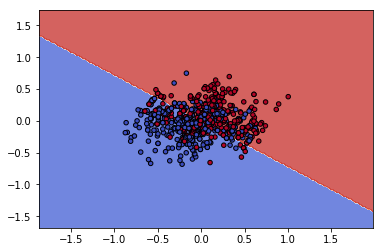

In [5]:
from sklearn.decomposition import PCA

Xs = [p[0] for p in dataset]
ys = [p[1] for p in dataset]

pca = PCA(n_components=2)
Xs_2d = pca.fit_transform(Xs)

weights = {
    'top_level_align_score': 1, 
    'top_level_balance_score': 1, 
    'top_level_overlapping_area': 1, 
    'avg_element_width': 1, 
    'avg_element_height': 1, 
    'avg_alignment_score': 1, 
    'density': 1, 
    'imbalance': -1
}

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

from sklearn.model_selection import train_test_split, KFold
from sklearn import svm

def train(Xs, ys, plot=True):

    X_train_dev, X_test, y_train_dev, y_test = train_test_split(Xs, ys, test_size=0.25, random_state=42)
    X_train, X_dev, y_train, y_dev = train_test_split(X_train_dev, y_train_dev, test_size=0.25, random_state=33)

    clf = svm.LinearSVC(fit_intercept=False)
    clf.fit(X_train, y_train)

    print(clf.coef_)
    print(clf.intercept_)
    
    pred = clf.predict(X_train)
    train_acc = np.sum(pred == y_train) / len(pred)
    print("# train acc: {}".format(train_acc))
    
    pred = clf.predict(X_dev)
    dev_acc = np.sum(pred == y_dev) / len(pred)
    print("# dev acc: {}".format(dev_acc))
    
    if plot:
        fig, ax = plt.subplots()

        X0, X1 = Xs[:, 0], Xs[:, 1]
        xx, yy = make_meshgrid(X0, X1)
        plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
        ax.scatter(X0, X1, c=ys, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())

train(Xs_2d, ys)

print([sorted(weights.keys())])
train(Xs, ys, plot=False)